<a href="https://colab.research.google.com/github/programmerfaz/Machine-learning-Projects/blob/main/Heart_Disease_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Heart Disease Prediction Using Logistic Regressiont**

A heart disease prediction system using machine learning with logistic regression is designed to predict the likelihood of heart disease based on various health factors. Logistic regression, a statistical model suitable for binary classification tasks, analyzes relationships between input features like age, blood pressure, cholesterol levels, and exercise-induced angina to predict outcomes such as the presence or absence of heart disease. The system learns from historical data and can provide valuable insights to healthcare professionals, aiding in early diagnosis and personalized treatment recommendations.

In this project, I will use the logistic regression (L.R.) technique to predict whether a person is haaving heart disease based on the data provided. Logistic Regression is a machine learning model which predicts the categorical dependent variable using set of parameters and independent or input variables. L.R. uses sigmoid function to allow the predicted value to fall into a particular category. Sigmoid function is a mathematical function which graphs the curve of the datapoints in the form of a S shaped curve which predicts the categorical class. Best fit line cannot be used in L.R. because of the prediction which the model makes cannot be fitted into a particular class or category.



In [32]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

In [3]:
#loading the dataset
disease_df = pd.read_csv('/content/drive/MyDrive/DATASET/Heart/framingham.csv')
disease_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


The last column that is TenYearCHD stands for whether the person has heart disease or not

0 --> No heart disease
1 --> Heart disease found

In [5]:
#removing unecessary column
disease_df.drop(["education"],inplace = True,axis =1)

In [6]:
disease_df.rename(columns={'male':'Sex_male'},inplace=True)

In [7]:
#Handling missing values
#removing NaN / Null values
disease_df.dropna(inplace=True,axis=0)

In [8]:
disease_df.head()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
disease_df.shape

(3751, 15)

In [10]:
disease_df.TenYearCHD.value_counts()

,count
TenYearCHD,
0,3179
1,572


Train and splitting the data

In [11]:
X = np.asarray(disease_df[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose']])
Y = np.asarray(disease_df['TenYearCHD'])

In [12]:
#Normalizing the data
X = preprocessing.StandardScaler().fit(X).transform(X)

In [13]:
print(X)

[[-1.23390951  1.11629198 -0.75552698 -0.93997111 -1.19619549 -0.20436458]
 [-0.4170173  -0.89582297 -0.75552698  0.29305664 -0.51572536 -0.24624229]
 [-0.18361952  1.11629198  0.9218319   0.18096321 -0.22085497 -0.49750858]
 ...
 [ 0.28317603 -0.89582297 -0.75552698  0.71901168  0.05133307  1.05196682]
 [-1.11721063  1.11629198 -0.75552698 -1.16415797  0.39156814 -0.41375315]
 [-1.23390951 -0.89582297  1.76051134 -0.91755243  0.02865074 -0.07873144]]


In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=4)

In [16]:
print(X.shape,X_train.shape,X_test.shape)

(3751, 6) (2625, 6) (1126, 6)


In [17]:
print(Y.shape,Y_train.shape,Y_test.shape)

(3751,) (2625,) (1126,)


Exploratory Data Analysis of Heart Disease Dataset

<ipython-input-19-b82c1ca9696e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD',data=disease_df,palette="BuGn_r")


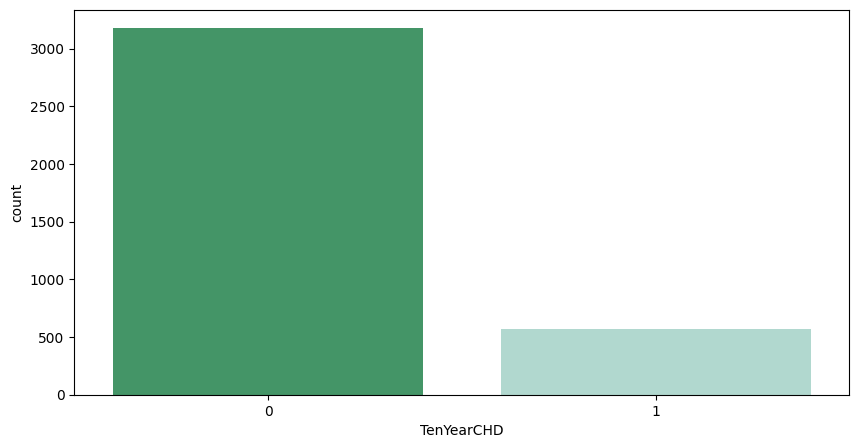

In [19]:
#counting the number of patients affected with CHD
plt.figure(figsize=(10,5))
sns.countplot(x='TenYearCHD',data=disease_df,palette="BuGn_r")
plt.show()

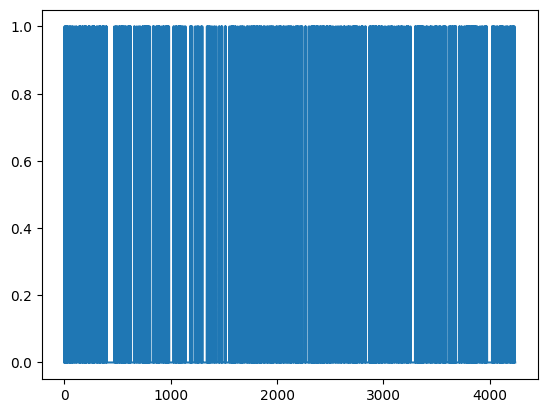

In [20]:
laste = disease_df["TenYearCHD"].plot()
plt.show()

Fitting the logistic regression model for heart Disease prediction

In [24]:
logistic_regression = LogisticRegression()

In [25]:
logistic_regression.fit(X_train,Y_train)

LogisticRegression()

In [26]:
y_pred  = logistic_regression.predict(X_test)

In [29]:
prediction_df = pd.DataFrame({'Actual':Y_test,'Predicted':y_pred})
print(prediction_df)

      Actual  Predicted
0          0          0
1          0          0
2          0          0
3          0          0
4          0          0
...      ...        ...
1121       0          0
1122       0          0
1123       0          0
1124       0          0
1125       0          0

[1126 rows x 2 columns]


In [34]:
#checking the accuracy of the trained model
print("Accuracy of the trained model is: ",accuracy_score(Y_test,y_pred)*100)

Accuracy of the trained model is:  84.90230905861456


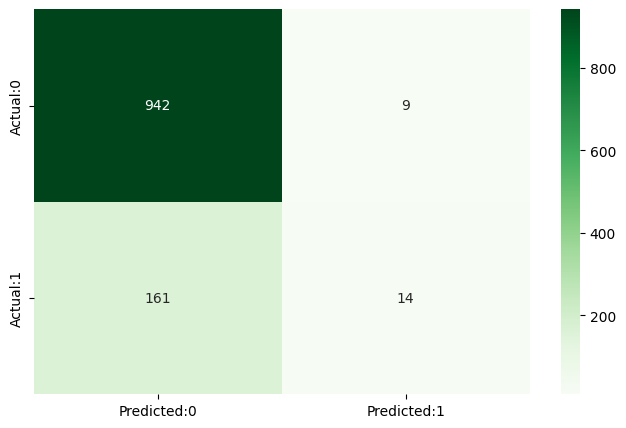

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



In [38]:
# Confusion matrix

cm = confusion_matrix(Y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(Y_test, y_pred))
